In [155]:
install.packages("dplyr")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [2]:
#install.packages("usmap")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [156]:
install.packages("ggplot2")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [5]:
install.packages("ggmap", repos='https://cran.r-project.org')

also installing the dependencies ‘RgoogleMaps’, ‘rjson’, ‘jpeg’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [120]:
install.packages("maps")

Warning message in install.packages("maps"):
“installation of package ‘maps’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [131]:
install.packages("geomapdata", repos='https://cran.r-project.org')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [122]:
library(maps)

In [132]:
library(geomapdata)

In [10]:
#library(usmap)

In [8]:
library(ggmap)

In [157]:
library(ggplot2)

In [158]:
library(dplyr)

In [16]:
setwd ("/Users/ruyazhang/downloads")

In [17]:
dat1 <- read.csv("Medicare90791.csv")

In [18]:
# group by state  use R or excel    use one code    aggregate service to different state

#automatic API

#result less than a month checkin weekly

In [19]:
vars <- c("State", "Gender", "Credentials", "City", "ProviderType")

In [20]:
medicare1 <- dat1[,vars]

In [21]:
summary(medicare1, maxsum = 100)

 State     Gender                  Credentials                 City      
 AE:   2   F:11240   LCSW                :3107   NEW YORK        :  179  
 AK:  20   M: 6281   PH.D.               :2657   SAN ANTONIO     :  153  
 AL: 135             PHD                 :1893   BROOKLYN        :  145  
 AR: 205             PSY.D.              :1228   CHICAGO         :  138  
 AZ: 228                                 :1122   LOS ANGELES     :  121  
 CA:1210             PSYD                : 772   SPRINGFIELD     :  115  
 CO: 269             MD                  : 640   HOUSTON         :  114  
 CT: 330             M.D.                : 601   CHARLOTTE       :  112  
 DC:  26             LICSW               : 493   WILMINGTON      :  109  
 DE:  80             MSW                 : 328   INDIANAPOLIS    :  103  
 FL:1293             LMSW                : 317   SAN DIEGO       :  100  
 GA: 353             PH.D                : 252   DALLAS          :   90  
 HI:  30             MSW, LCSW        

In [22]:
#aggregate(dat1$NumberServices, by=list(State=dat1$State), FUN=sum)

In [23]:
#aggregate(NumberServices ~ State, dat1, sum)

In [24]:
aggNumServices <- aggregate(NumberServices ~ State, dat1, sum)

In [25]:
aggNumServices[order(aggNumServices$NumberServices),]

,State,NumberServices
55,ZZ,20.0
49,VI,28.0
1,AE,158.0
41,PR,208.0
2,AK,413.0
54,WY,1003.0
13,HI,1041.0
44,SD,1412.0
9,DC,1479.0
30,ND,1529.0


In [165]:
summary(aggNumServices)

     State    NumberServices 
 AE     : 1   Min.   :   20  
 AK     : 1   1st Qu.: 2974  
 AL     : 1   Median : 7625  
 AR     : 1   Mean   :13295  
 AZ     : 1   3rd Qu.:17532  
 CA     : 1   Max.   :64246  
 (Other):49                  

In [27]:
setwd ("/Users/ruyazhang/downloads")

In [28]:
dat2 <- read.csv("StateCountyFFS2017.csv")

In [29]:
stateBeneficiaries <- select(filter(dat2, County == "STATE TOTAL"), c(State, Beneficiaries) )

In [30]:
print(stateBeneficiaries)

   State Beneficiaries
1     AK      82927.00
2     AL     969116.00
3     AR     593592.00
4     AZ    1155335.00
5     CA    5478663.00
6     CO     789379.00
7     CT     604883.00
8     DC      76084.00
9     DE     184883.00
10    FL    4148415.00
11    GA    1544616.00
12    HI     231721.00
13    IA     577446.00
14    ID     294633.00
15    IL    2007176.00
16    IN    1160602.00
17    KS     485625.00
18    KY     857387.00
19    LA     797069.00
20    MA    1174969.00
21    MD     881248.00
22    ME     306728.00
23    MI    1926676.00
24    MN     923747.00
25    MO    1129912.00
26    MS     565678.00
27    MT     206080.00
28    NC    1823347.00
29    ND     118011.00
30    NE     312343.00
31    NH     258658.00
32    NJ    1422817.00
33    NM     370629.00
34    NV     452921.00
35    NY    3208508.00
36    OH    2143757.00
37    OK     669922.00
38    OR     767980.00
39    PA    2491524.00
40    PR     633773.00
41    RI     192336.00
42    SC     973995.00
43    SD   

In [31]:
#df <- merge(x=stateBeneficiaries, y=aggNumServices, by = "State", all=TRUE, sort=TRUE)

In [32]:
df <- merge(x=stateBeneficiaries, y=aggNumServices, by = "State")

In [33]:
print(df)

   State Beneficiaries NumberServices
1     AK      82927.00          413.0
2     AL     969116.00         7776.0
3     AR     593592.00         7105.0
4     AZ    1155335.00         8856.0
5     CA    5478663.00        64246.0
6     CO     789379.00         8227.0
7     CT     604883.00        14685.0
8     DC      76084.00         1479.0
9     DE     184883.00         2996.0
10    FL    4148415.00        59269.0
11    GA    1544616.00        16984.0
12    HI     231721.00         1041.0
13    IA     577446.00         6213.0
14    ID     294633.00         3321.0
15    IL    2007176.00        33424.0
16    IN    1160602.00        20420.0
17    KS     485625.00         6730.0
18    KY     857387.00         8050.0
19    LA     797069.00         7901.0
20    MA    1174969.00        31611.0
21    MD     881248.00        19657.0
22    ME     306728.00         4799.0
23    MI    1926676.00        31921.0
24    MN     923747.00        12086.0
25    MO    1129912.00        11106.0
26    MS    

In [34]:
numera <- df[,3]

In [35]:
denom <- as.numeric(as.character(df[,2]))

In [36]:
Rate=numera/denom*1000

In [37]:
print(Rate)

 [1]  4.9802839  8.0238073 11.9695009  7.6653092 11.7265837 10.4221166
 [7] 24.2774222 19.4390411 16.2048431 14.2871434 10.9956131  4.4924715
[13] 10.7594476 11.2716498 16.6522517 17.5943174 13.8584299  9.3889924
[19]  9.9125672 26.9036885 22.3058662 15.6457839 16.5679128 13.0836690
[25]  9.8290840  8.4712504  8.6083075 16.3419250 12.9564193  9.7681075
[31] 19.4542601 22.6058587  8.3344800  5.9326019 16.3608755 12.2026890
[37] 11.3819221  5.8816636 14.6865934  0.3281932 19.2683637  9.9538499
[43]  8.9345035 12.4846125 14.2097082  8.5887215 13.6289758  1.5422749
[49] 11.7994325  7.3812827 10.4654886  7.2945689 10.3176563


In [38]:
df$Rate <- numera/denom*1000

In [39]:
#df$Rate <- as.character(df$Rate )

In [40]:
#df$Rate <- as.numeric(gsub(',', '', df$Rate ))

In [41]:
#print(df)

In [42]:
print(df)

   State Beneficiaries NumberServices       Rate
1     AK      82927.00          413.0  4.9802839
2     AL     969116.00         7776.0  8.0238073
3     AR     593592.00         7105.0 11.9695009
4     AZ    1155335.00         8856.0  7.6653092
5     CA    5478663.00        64246.0 11.7265837
6     CO     789379.00         8227.0 10.4221166
7     CT     604883.00        14685.0 24.2774222
8     DC      76084.00         1479.0 19.4390411
9     DE     184883.00         2996.0 16.2048431
10    FL    4148415.00        59269.0 14.2871434
11    GA    1544616.00        16984.0 10.9956131
12    HI     231721.00         1041.0  4.4924715
13    IA     577446.00         6213.0 10.7594476
14    ID     294633.00         3321.0 11.2716498
15    IL    2007176.00        33424.0 16.6522517
16    IN    1160602.00        20420.0 17.5943174
17    KS     485625.00         6730.0 13.8584299
18    KY     857387.00         8050.0  9.3889924
19    LA     797069.00         7901.0  9.9125672
20    MA    1174969.

In [98]:
#delete DC, PR, VI states
df <- df[-c(8, 40, 48),]

In [99]:
print(df)

   State Beneficiaries NumberServices      Rate
1     AK      82927.00          413.0  4.980284
2     AL     969116.00         7776.0  8.023807
3     AR     593592.00         7105.0 11.969501
4     AZ    1155335.00         8856.0  7.665309
5     CA    5478663.00        64246.0 11.726584
6     CO     789379.00         8227.0 10.422117
7     CT     604883.00        14685.0 24.277422
9     DE     184883.00         2996.0 16.204843
10    FL    4148415.00        59269.0 14.287143
11    GA    1544616.00        16984.0 10.995613
12    HI     231721.00         1041.0  4.492472
13    IA     577446.00         6213.0 10.759448
14    ID     294633.00         3321.0 11.271650
15    IL    2007176.00        33424.0 16.652252
16    IN    1160602.00        20420.0 17.594317
17    KS     485625.00         6730.0 13.858430
18    KY     857387.00         8050.0  9.388992
19    LA     797069.00         7901.0  9.912567
20    MA    1174969.00        31611.0 26.903689
21    MD     881248.00        19657.0 22

Warning message:
“Use of `map_df$x` is discouraged. Use `x` instead.”Warning message:
“Use of `map_df$y` is discouraged. Use `y` instead.”Warning message:
“Use of `map_df$group` is discouraged. Use `group` instead.”

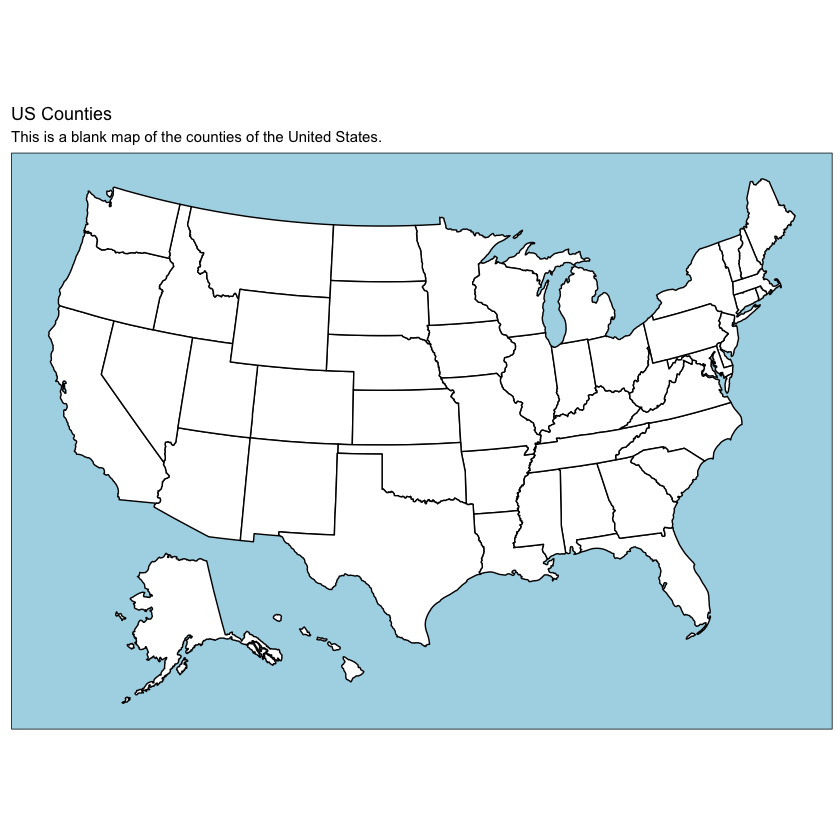

In [43]:
#usmap package with ggplot2, did not figure out how to use it
plot_usmap(regions = "states") + 
  labs(title = "US Counties",
       subtitle = "This is a blank map of the counties of the United States.") + 
  theme(panel.background = element_rect(color = "black", fill = "lightblue"))

In [44]:
 #did not figure out
map_with_data(data=df, values = "Rate", include = c(), exclude = c(),
      na = NA)

ERROR: Error in map_with_data(data = df, values = "Rate", include = c(), exclude = c(), : `data` must be a data.frame containing either a `state` or `fips` column.


In [45]:
#plot_usmap(data = df, values = "Rate", labels = TRUE, label_color = "white")

In [46]:
#did not figure out
plot_usmap(data = df, values = "Rate", color = "red") + 
  scale_fill_continuous(name = "Rate (2017)", label = scales::comma) + 
  theme(legend.position = "right")

ERROR: Error in map_with_data(data, values = values, include = include, exclude = exclude): `data` must be a data.frame containing either a `state` or `fips` column.


In [47]:
#did not figure out
states_map <- map_data("state")

In [48]:
#ggplot(df, aes(long, lat, group = group))+
 # geom_polygon(aes(fill = Rate), color = "white")+
 # scale_fill_viridis_c(option = "C")

In [49]:
#did not figure out
library(tidyverse)
library(urbnmapr)

ggplot() + 
  geom_polygon(data = urbnmapr::states, mapping = aes(x = long, y = lat, group = group),
		           fill = “grey”, color = “white”) +
  coord_map(projection = "albers", lat0 = 39, lat1 = 45)

ERROR: Error in parse(text = x, srcfile = src): <text>:6:35: unexpected input
5:   geom_polygon(data = urbnmapr::states, mapping = aes(x = long, y = lat, group = group),
6:                            fill = <e2>
                                     ^


In [50]:
#did not figure out
household_data <- left_join(df by = "State") 

household_data %>%
  ggplot(aes(long, lat, group = group, fill = Rate)) +
  geom_polygon(color = NA) +
  coord_map(projection = "albers", lat0 = 39, lat1 = 45) +
  labs(fill = "Median Household Income")

ERROR: Error in parse(text = x, srcfile = src): <text>:2:32: unexpected symbol
1: 
2: household_data <- left_join(df by
                                  ^


In [51]:
#did not figure out
tm_shape(df) +
  tm_polygons("Rate")

ERROR: Error in tm_shape(df): could not find function "tm_shape"


In [107]:
states <- map_data("state")

In [108]:
dim(states)

[1] 15537     6

In [109]:
head(states)

long,lat,group,order,region,subregion
-87.46201,30.38968,1,1,alabama,NA
-87.48493,30.37249,1,2,alabama,NA
-87.52503,30.37249,1,3,alabama,NA
-87.53076,30.33239,1,4,alabama,NA
-87.57087,30.32665,1,5,alabama,NA
-87.58806,30.32665,1,6,alabama,NA


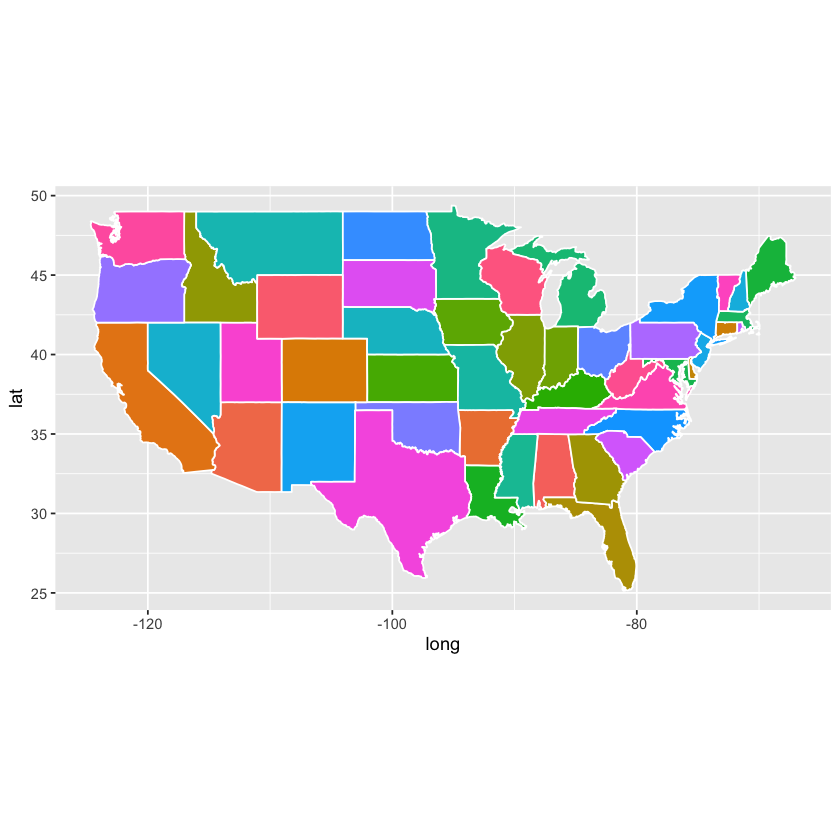

In [78]:
ggplot(data = states) + 
  geom_polygon(aes(x = long, y = lat, fill = region, group = group), color = "white") + 
  coord_fixed(1.3) +
  guides(fill=FALSE) 

In [92]:
#Match state name file (in abbreviation, to below formula)
states <- setNames(as.list(datasets::state.name), datasets::state.abb)

In [93]:
states[["AL"]]

[1] "Alabama"

In [102]:
df$State <- setNames(as.list(datasets::state.name), datasets::state.abb)

In [103]:
df$State <- tolower(df$State)

In [104]:
print(df)

            State Beneficiaries NumberServices      Rate
1         alabama      82927.00          413.0  4.980284
2          alaska     969116.00         7776.0  8.023807
3         arizona     593592.00         7105.0 11.969501
4        arkansas    1155335.00         8856.0  7.665309
5      california    5478663.00        64246.0 11.726584
6        colorado     789379.00         8227.0 10.422117
7     connecticut     604883.00        14685.0 24.277422
9        delaware     184883.00         2996.0 16.204843
10        florida    4148415.00        59269.0 14.287143
11        georgia    1544616.00        16984.0 10.995613
12         hawaii     231721.00         1041.0  4.492472
13          idaho     577446.00         6213.0 10.759448
14       illinois     294633.00         3321.0 11.271650
15        indiana    2007176.00        33424.0 16.652252
16           iowa    1160602.00        20420.0 17.594317
17         kansas     485625.00         6730.0 13.858430
18       kentucky     857387.00

In [83]:
#within that formula, there was 50 states, in my data, there were 53, so i deleted 3 states see above 
dput(states)

list(AL = "Alabama", AK = "Alaska", AZ = "Arizona", AR = "Arkansas", 
    CA = "California", CO = "Colorado", CT = "Connecticut", DE = "Delaware", 
    FL = "Florida", GA = "Georgia", HI = "Hawaii", ID = "Idaho", 
    IL = "Illinois", IN = "Indiana", IA = "Iowa", KS = "Kansas", 
    KY = "Kentucky", LA = "Louisiana", ME = "Maine", MD = "Maryland", 
    MA = "Massachusetts", MI = "Michigan", MN = "Minnesota", 
    MS = "Mississippi", MO = "Missouri", MT = "Montana", NE = "Nebraska", 
    NV = "Nevada", NH = "New Hampshire", NJ = "New Jersey", NM = "New Mexico", 
    NY = "New York", NC = "North Carolina", ND = "North Dakota", 
    OH = "Ohio", OK = "Oklahoma", OR = "Oregon", PA = "Pennsylvania", 
    RI = "Rhode Island", SC = "South Carolina", SD = "South Dakota", 
    TN = "Tennessee", TX = "Texas", UT = "Utah", VT = "Vermont", 
    VA = "Virginia", WA = "Washington", WV = "West Virginia", 
    WI = "Wisconsin", WY = "Wyoming")


In [166]:
data <- merge(states, df, by.x='region', by.y='State')

In [111]:
head(data)

region,long,lat,group,order,subregion,Beneficiaries,NumberServices,Rate
alabama,-87.46201,30.38968,1,1,NA,82927.00,413,4.980284
alabama,-87.48493,30.37249,1,2,NA,82927.00,413,4.980284
alabama,-87.95475,30.24644,1,13,NA,82927.00,413,4.980284
alabama,-88.00632,30.24071,1,14,NA,82927.00,413,4.980284
alabama,-88.01778,30.25217,1,15,NA,82927.00,413,4.980284
alabama,-87.52503,30.37249,1,3,NA,82927.00,413,4.980284


In [161]:
data$Beneficiaries <- as.numeric(as.character(data$Beneficiaries))

In [162]:
head(data)

region,long,lat,group,order,subregion,Beneficiaries,NumberServices,Rate
alabama,-87.46201,30.38968,1,1,NA,82927,413,4.980284
alabama,-87.48493,30.37249,1,2,NA,82927,413,4.980284
alabama,-87.95475,30.24644,1,13,NA,82927,413,4.980284
alabama,-88.00632,30.24071,1,14,NA,82927,413,4.980284
alabama,-88.01778,30.25217,1,15,NA,82927,413,4.980284
alabama,-87.52503,30.37249,1,3,NA,82927,413,4.980284


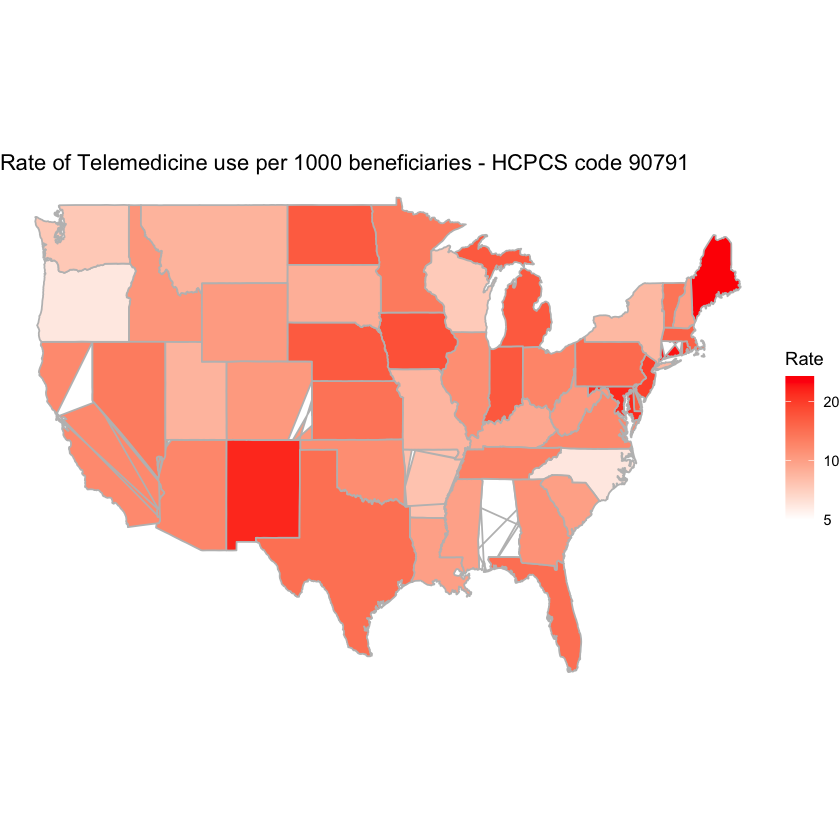

In [170]:
ggplot(data, aes(x=long, y=lat, group=group, fill=Rate)) + 
geom_polygon(color='gray') + coord_fixed(1.6) + scale_fill_gradient(low='white',
  high='red', trans = "log10") +
theme_void() +
ggtitle('Rate of Telemedicine use per 1000 beneficiaries - HCPCS code 90791')